# MNIST Classifier Model

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import keras
from keras.datasets import mnist

import tensorflow as tf

from sklearn.model_selection import train_test_split

## Load and Visualize Data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


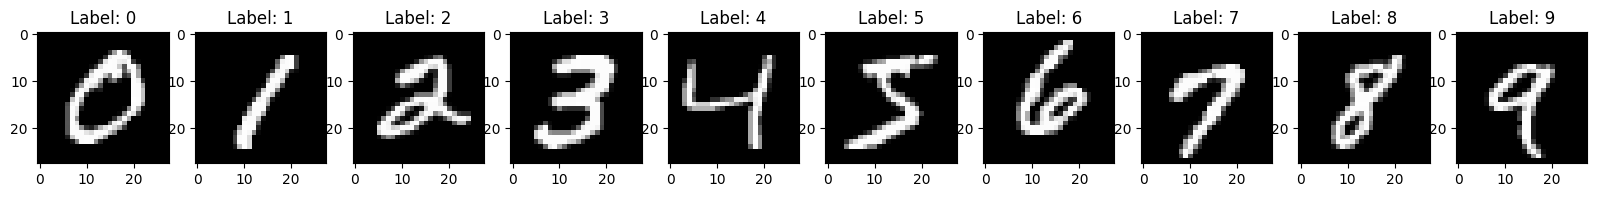

In [4]:
num_classes = 10
f, ax = plt.subplots(nrows=1, ncols=num_classes, figsize=(20,20))

for i in range(0, num_classes):
  img_sample = X_train[y_train == i][0]
  ax[i].imshow(img_sample, cmap='gray')
  ax[i].set_title('Label: ' + str(i))


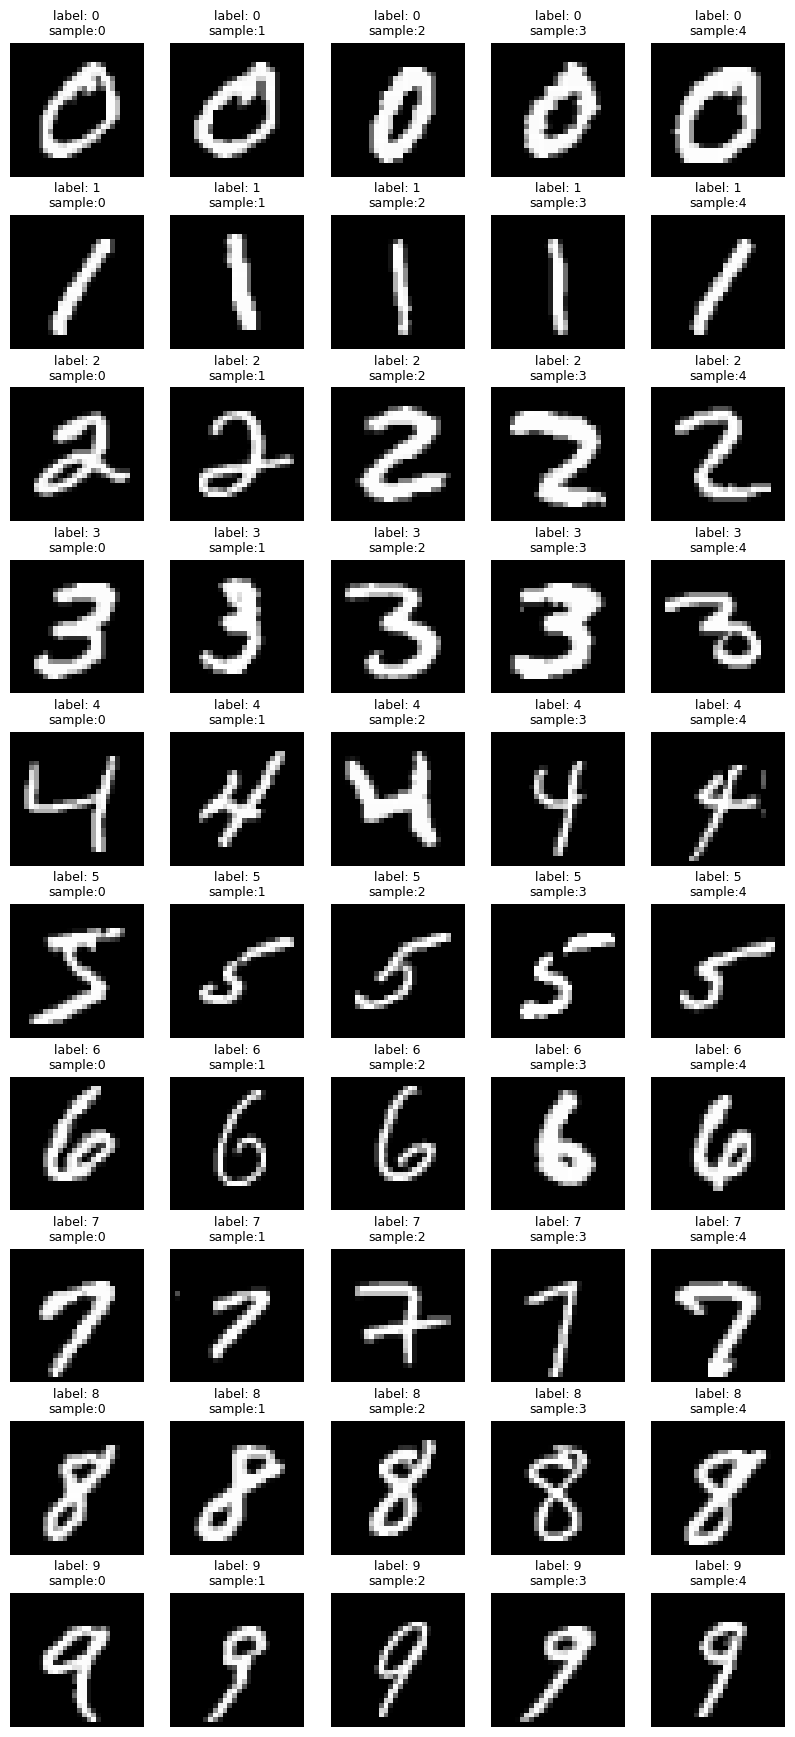

In [5]:
label_to_sample = 10
f, ax = plt.subplots(nrows=label_to_sample, ncols=5, figsize=(10,22))

for i in range(0, label_to_sample):
  img_sample = X_train[y_train == i][:5]
  for j in range(0, 5):
      ax[i][j].imshow(img_sample[j], cmap='gray')
      ax[i][j].set_title(f'label: {str(i)}\nsample:{str(j)}', fontsize=9)
      ax[i][j].axis('off')

## Prepare Data

In [6]:
X_train = X_train / 225
X_test = X_test / 225
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train_ann = X_train.reshape(X_train.shape[0], -1)
X_test_ann = X_test.reshape(X_test.shape[0], -1)
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [10]:
X_test_ann , X_valid_ann, y_test_ann, y_valid_ann = train_test_split(X_test_ann, y_test, test_size=0.5, random_state=0)

In [11]:
X_test_cnn, X_valid_cnn, y_test_cnn, y_valid_cnn = train_test_split(X_test_cnn, y_test, test_size=0.5, random_state=0)

## Model Creation

### Fully Connected Neural Network

In [12]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [13]:
ann.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 13479

Epoch 1/20
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2922 - accuracy: 0.9123 - val_loss: 0.1440 - val_accuracy: 0.9534
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1284 - accuracy: 0.9620 - val_loss: 0.0975 - val_accuracy: 0.9694
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0951 - accuracy: 0.9721 - val_loss: 0.0994 - val_accuracy: 0.9694
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0738 - accuracy: 0.9782 - val_loss: 0.0840 - val_accuracy: 0.9744
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0705 - val_accuracy: 0.9796
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0736 - val_accuracy: 0.9792
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.0912 - val_accu

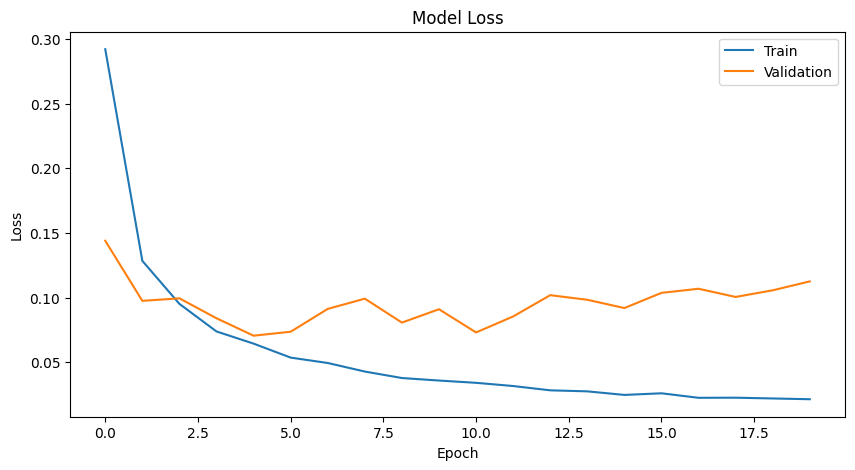

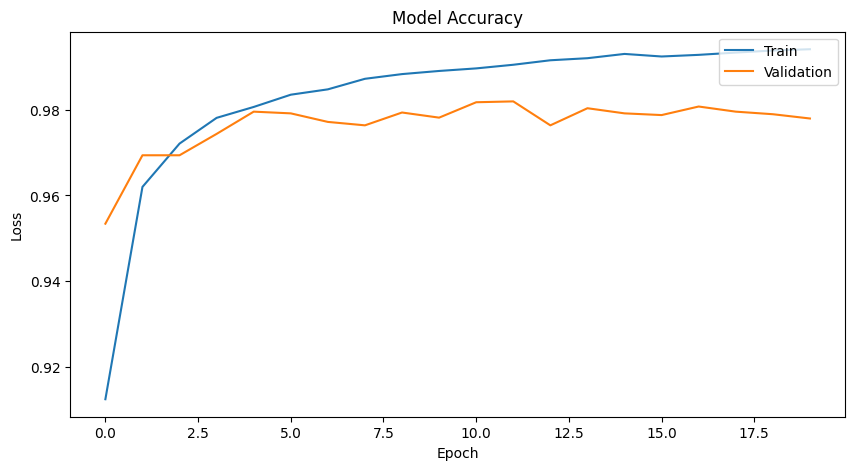

In [15]:
history = ann.fit(X_train_ann, y_train, epochs=20, batch_size=32, validation_data=(X_valid_ann, y_valid_ann))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [16]:
ann.evaluate(X_test_ann, y_test_ann)

157/157 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9810


[0.1171722561120987, 0.9810000061988831]

In [27]:
predictions = ann.predict([X_test_ann])

157/157 [==============================] - 0s 2ms/step


In [18]:
predicted_class = tf.argmax(predictions, axis=-1).numpy()
predicted_class

array([5, 2, 9, ..., 1, 1, 6])

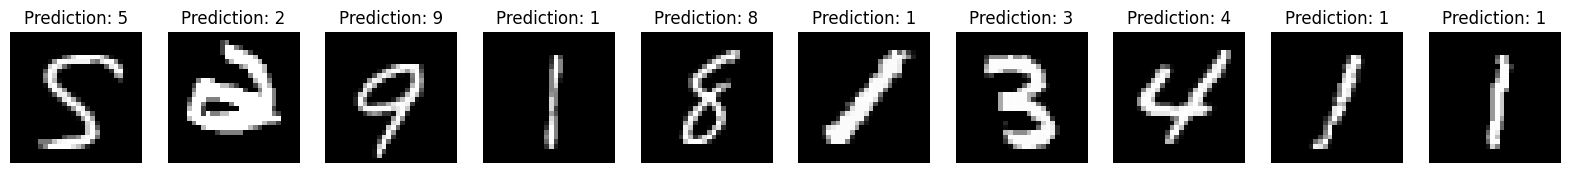

In [29]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,20))

for i in range(0, 10):
    img_sample = X_test_ann[i].reshape(28, 28)
    ax[i].imshow(img_sample, cmap='gray')
    ax[i].set_title(f'Prediction: {predicted_class[i]}', fontsize=12)
    ax[i].axis('off')

plt.show()

## Convolutional Neural Network

In [21]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [22]:
cnn.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

Epoch 1/20
1875/1875 [==============================] - 59s 31ms/step - loss: 0.1476 - accuracy: 0.9548 - val_loss: 0.0422 - val_accuracy: 0.9868
Epoch 2/20
1875/1875 [==============================] - 57s 31ms/step - loss: 0.0493 - accuracy: 0.9846 - val_loss: 0.0392 - val_accuracy: 0.9866
Epoch 3/20
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0346 - accuracy: 0.9887 - val_loss: 0.0256 - val_accuracy: 0.9914
Epoch 4/20
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0407 - val_accuracy: 0.9862
Epoch 5/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.0443 - val_accuracy: 0.9882
Epoch 6/20
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0166 - accuracy: 0.9947 - val_loss: 0.0337 - val_accuracy: 0.9904
Epoch 7/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0327 -

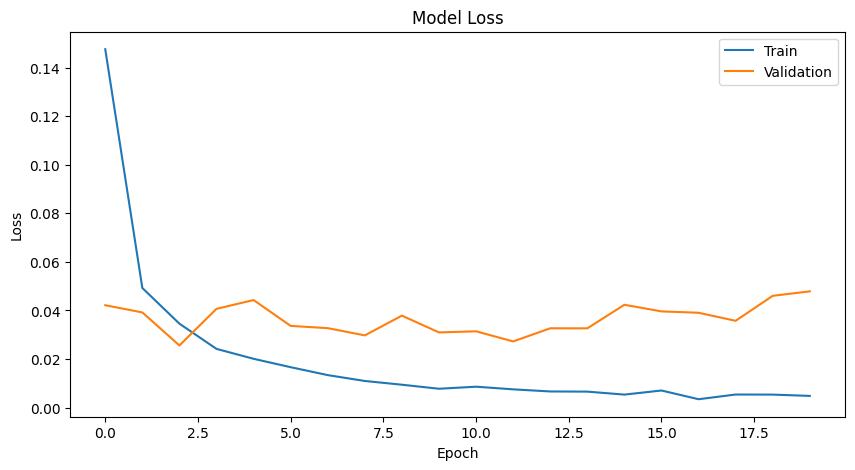

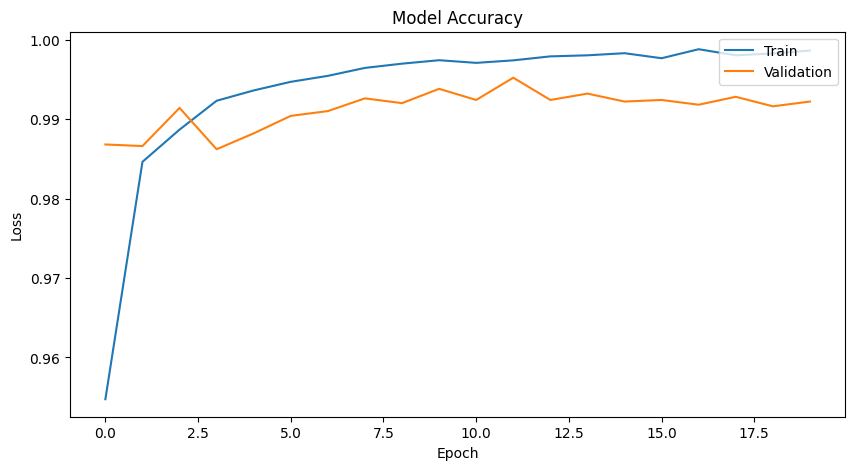

In [23]:
history = cnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_valid_cnn, y_valid_cnn))

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [26]:
cnn.evaluate(X_test_cnn, y_test_cnn)

157/157 [==============================] - 2s 13ms/step - loss: 0.0583 - accuracy: 0.9892


[0.05826621875166893, 0.9891999959945679]

In [28]:
predictions = cnn.predict([X_test_cnn])

157/157 [==============================] - 2s 13ms/step


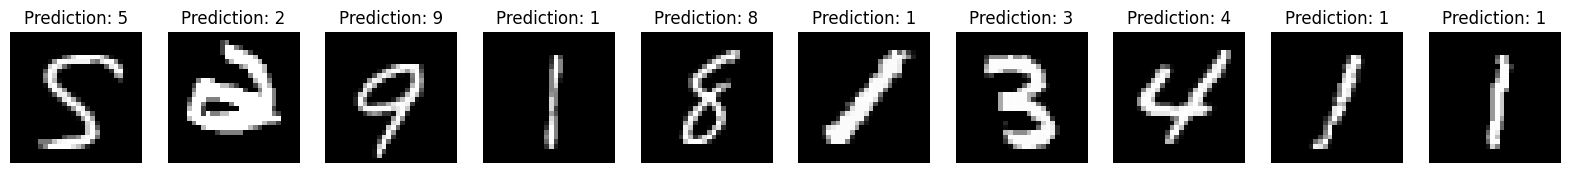

In [30]:
f, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,20))

for i in range(0, 10):
    img_sample = X_test_cnn[i].reshape(28, 28)
    ax[i].imshow(img_sample, cmap='gray')
    ax[i].set_title(f'Prediction: {predicted_class[i]}', fontsize=12)
    ax[i].axis('off')

plt.show()

In [31]:
cnn.save('MNIST-cnn-model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
